# <center> <font color='blue'>**LINEAR REGRESSION**</font> </center>

### **Importing Libraries**

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **All About Data**

In [2]:
df = pd.read_csv(r"C:\Users\91939\Downloads\Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
len(df.columns)

8

In [7]:
df.columns[1]

'X1 transaction date'

In [8]:
# Replacing column names with numbers

df.columns = [num for num in range(len(df.columns))]
df.head()

,0,1,2,3,4,5,6,7
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### **Creating DataFrame for Dividing it into <font color = 'red'> Train </font> and <font color = 'red'> Test </font> Data**

In [9]:
X_df1 = df.drop(df.columns[[0, 2, 3, 4, 5, 6, 7]], axis = 1)
X_df2 = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7]], axis = 1)
X_df3 = df.drop(df.columns[[0, 1, 2, 4, 5, 6, 7]], axis = 1)
X_df4 = df.drop(df.columns[[0, 1, 2, 3, 5, 6, 7]], axis = 1)
X_df5 = df.drop(df.columns[[0, 1, 2, 3, 4, 6, 7]], axis = 1)
X_df6 = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 7]], axis = 1)
X_df7 = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6]], axis = 1)
print("X_df2 : ")
X_df2.head()

X_df2 : 


,2
0,32.0
1,19.5
2,13.3
3,13.3
4,5.0


In [10]:
Y_df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6]], axis = 1)
Y_df.head()

,7
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


### **Spliting Data For Training and Testing**

In [11]:
X_train = X_df2.sample(frac = 0.8, random_state = 200)
X_test = X_df2.drop(X_train.index)

Y_train = Y_df.sample(frac = 0.8, random_state = 200)
Y_test = Y_df.drop(Y_train.index)

In [12]:
# Changing Dataframe to array

X_train_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()
Y_train_arr = Y_train.to_numpy()
Y_test_arr = Y_test.to_numpy()

In [13]:
print("Input Train Shape : ", X_train_arr.shape)
print("Input Test Shape : ", X_test_arr.shape)

Input Train Shape :  (331, 1)
Input Test Shape :  (83, 1)


In [14]:
print("Output Train Shape : ", Y_train_arr.shape)
print("Output Test Shape : ", Y_test_arr.shape)

Output Train Shape :  (331, 1)
Output Test Shape :  (83, 1)


### **Data Visualization**

<module 'matplotlib.pyplot' from 'C:\\Users\\91939\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

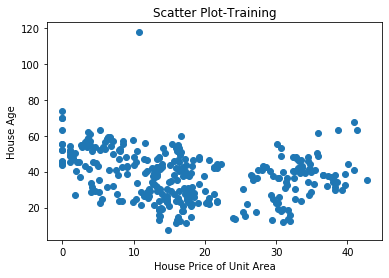

In [15]:
plt.scatter(X_train_arr, Y_train_arr)
plt.title("Scatter Plot-Training")
plt.xlabel("House Price of Unit Area")
plt.ylabel("House Age")
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\91939\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

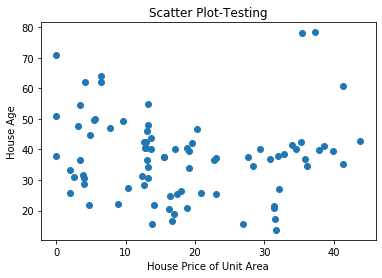

In [16]:
plt.scatter(X_test_arr, Y_test_arr)
plt.title("Scatter Plot-Testing")
plt.xlabel("House Price of Unit Area")
plt.ylabel("House Age")
plt

### **Initializing Parameters**

In [17]:
def initialize_with_zeros(dim):
    theta = []
    weight = np.zeros((dim, 1))
    bias = 0
    theta.append(weight)
    theta.append(bias)
    return theta

### **Hypothesis Function**

In [18]:
def hypothesis(theta, x):
    z = x * theta[1] + theta[0]
    return z

### **Cost Function**

In [19]:
def cost_func(x, y, theta):
    sum = 0
    for i in range(len(x)):
        sum += (hypothesis(theta, x[i]) - y[i]) ** 2
    return sum / len(x)

### **Gradient Function**

In [20]:
def grad_func(x, y, theta, l_rate):
    slope_drev = 0
    const_drev = 0
    cost_each_iter = []
    revised_param = []
    
    for i in range(len(x)):
        slope_drev += 2 * x[i] * (hypothesis(theta, x[i]) - y[i])
        const_drev += 2 * (hypothesis(theta, x[i]) - y[i])
        cost_each_iter.append(cost_func(x, y, theta)[0])
        theta[1] -= l_rate * slope_drev
        theta[0] -= l_rate * const_drev
        revised_param = {"slope": theta[1], "constant": theta[0]}
    
    return cost_each_iter, revised_param

### **Training**

In [21]:
def train(x, y, theta, l_rate, iterations):
    param = []
    
    for i in range(iterations):
        cost_each_iter, revised_param = grad_func(x, y, theta, l_rate)
        theta[1] = revised_param["slope"]
        theta[0] = revised_param["constant"]
        
        if i % 10 == 0:
            print("Cost at ", i, "th iteration:", cost_func(x, y, theta)[0])
        
        param = {"slope": theta[1], "constant": theta[0]}
        
    return param, cost_each_iter, revised_param

### **Prediction Function**

In [22]:
def predict(after_hypo, m):
    m = m.shape[0]
    y_pred = np.zeros((1, m))
    y_prediction = []
    for i in range(after_hypo.shape[0]):
        if after_hypo[i, 0] > 37:                    
            y_pred[0, i] = 40
        else:
            y_pred[0, i] = 35
        y_prediction.append(y_pred[0, i])
    return y_prediction

### **Loading Into A Model**

In [23]:
def model():
    l_rate = 0.000001
    iterations = 500
    theta = initialize_with_zeros(1)
    param, cost_each_iter, revised_param = train(X_train_arr, Y_train_arr, theta, l_rate, iterations)
    return param, cost_each_iter, revised_param

In [24]:
param, cost_each_iter, revised_param = model()

Cost at  0 th iteration: [1454.72868121]
Cost at  10 th iteration: [473.99139369]
Cost at  20 th iteration: [316.72612458]
Cost at  30 th iteration: [248.1552641]
Cost at  40 th iteration: [212.79651681]
Cost at  50 th iteration: [194.35994508]
Cost at  60 th iteration: [184.80097764]
Cost at  70 th iteration: [179.89365214]
Cost at  80 th iteration: [177.41043652]
Cost at  90 th iteration: [176.18079642]
Cost at  100 th iteration: [175.5923964]
Cost at  110 th iteration: [175.32681594]
Cost at  120 th iteration: [175.21984167]
Cost at  130 th iteration: [175.18779391]
Cost at  140 th iteration: [175.18878379]
Cost at  150 th iteration: [175.20241247]
Cost at  160 th iteration: [175.21918625]
Cost at  170 th iteration: [175.23503583]
Cost at  180 th iteration: [175.24850679]
Cost at  190 th iteration: [175.25934055]
Cost at  200 th iteration: [175.26777356]
Cost at  210 th iteration: [175.27420338]
Cost at  220 th iteration: [175.27903913]
Cost at  230 th iteration: [175.28264218]
Cost

In [25]:
theta = []
theta.append(param["constant"])
theta.append(param["slope"])
after_hypo = hypothesis(theta, X_train_arr)
train_pred = predict(after_hypo, X_train_arr)
after_hypo_test = hypothesis(theta, X_test_arr)
test_pred = predict(after_hypo_test, X_test_arr)

In [26]:
print(after_hypo.shape)

(331, 1)


In [27]:
print(train_pred)

[35.0, 40.0, 35.0, 35.0, 40.0, 40.0, 35.0, 35.0, 40.0, 35.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 35.0, 40.0, 35.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 35.0, 35.0, 40.0, 35.0, 40.0, 40.0, 40.0, 35.0, 40.0, 35.0, 35.0, 40.0, 35.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 35.0, 35.0, 40.0, 40.0, 35.0, 35.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 35.0, 35.0, 40.0, 40.0, 40.0, 35.0, 40.0, 35.0, 40.0, 35.0, 40.0, 35.0, 35.0, 40.0, 40.0, 40.0, 35.0, 35.0, 35.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 35.0, 40.0, 35.0, 40.0, 35.0, 40.0, 35.0, 35.0, 40.0, 40.0, 35.0, 35.0, 35.0, 40.0, 35.0, 40.0, 35.0, 40.0, 40.0, 35.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 35.

In [28]:
print(test_pred)

[35.0, 35.0, 40.0, 35.0, 35.0, 40.0, 40.0, 35.0, 35.0, 35.0, 35.0, 35.0, 40.0, 35.0, 40.0, 40.0, 35.0, 35.0, 40.0, 40.0, 35.0, 35.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 35.0, 35.0, 35.0, 40.0, 35.0, 40.0, 40.0, 35.0, 35.0, 40.0, 40.0, 35.0, 35.0, 40.0, 35.0, 40.0, 40.0, 35.0, 40.0, 35.0, 35.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 35.0, 40.0, 40.0, 35.0, 40.0, 35.0, 40.0, 35.0, 40.0]


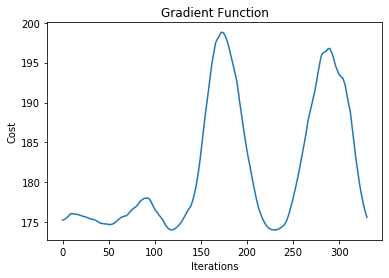

In [29]:
plt.plot(cost_each_iter)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Function")
plt.show()

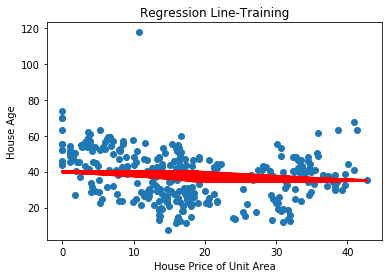

In [30]:
plt.scatter(X_train_arr, Y_train_arr)
plt.title("Regression Line-Training")
plt.xlabel("House Price of Unit Area")
plt.ylabel("House Age")
plt.plot(X_train_arr, train_pred, color='red', linewidth=3)
plt.show()

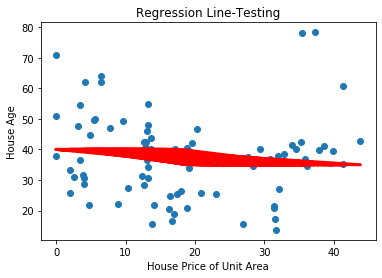

In [31]:
plt.scatter(X_test_arr, Y_test_arr)
plt.title("Regression Line-Testing")
plt.xlabel("House Price of Unit Area")
plt.ylabel("House Age")
plt.plot(X_test_arr, test_pred, color='red', linewidth=3)
plt.show()

In [32]:
print("Train Accuracy: {} %".format(100 - np.mean(np.abs(train_pred - Y_train_arr))))
print("Test Accuracy: {} %".format(100 - np.mean(np.abs(test_pred - Y_test_arr))))

Train Accuracy: 88.95528700906344 %
Test Accuracy: 89.76176513282044 %
